# Simple Transport Model

We create simple transport model.
After some imports:

In [1]:
from pymf6.modeling_tools.make_model import run_simulation
from pymf6.modeling_tools.plotting import show_heads, show_well_head, show_concentration, show_bcs

We use our tools and create new model data:

In [2]:
model_path = 'models/mf6'
name = 'transport'

In [3]:
# %load create_model.py
"""Create  simple tranport model."""

from pymf6.modeling_tools.make_model import make_input
from pymf6.modeling_tools.base_model import make_model_data


def create_model(model_path, name):
    """Create tranport model."""
    chd = []
    for row in range(10):
        chd.append([(0, row, 0), 1., 10.0])  # concentration of 10 at left side 
    for row in range(10):
        chd.append([(0, row, 9), 0.5, 0.0])

    wells = {}
    for row in range(1, 9):
        wells[f'wel{row}'] =  {'q': (0, 0, 0), 'coords': (0, row, 4)}

    specific_model_data = {
        'model_path': model_path,
        'name': name,
        'transport': True,
        'times': (
            50.0,  # perlen (double) is the length of a stress period.
            120,   # nstp (integer) is the number of time steps in a stress period.
            1.0,   # tsmult (double) is the multiplier for the length of successive
                   # time steps.
        ),
        'obs': [
            ('upper_left', (0, 1, 7)),
            ('lower_right', (0, 8, 1))
        ],
        'chd': chd,
        'wells': wells,
        # 'cnc': [],
    }

    model_data = make_model_data(specific_model_data)
    del model_data['cnc']
    make_input(model_data)

and make a new model:

In [4]:
create_model(model_path, name)

There are two constant head CHD boundary conditions; left with a constant 
head of 1 m and right with 0.5 m.
There are wells WEL located in the center. 
Their pumping ate is zero. 

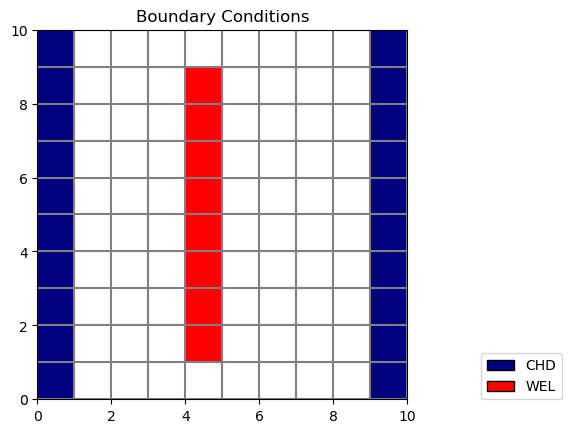

In [5]:
p = show_bcs(model_path=model_path, name=name)

We run the simulation:

In [6]:
run_simulation(model_path=model_path)

and look at the heads:

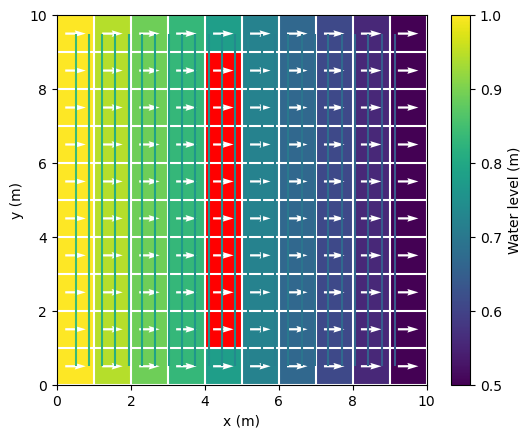

In [7]:
show_heads(model_path=model_path, name=name, title='');

We also apply a constant concentration of 10 mg/L at the left side: 

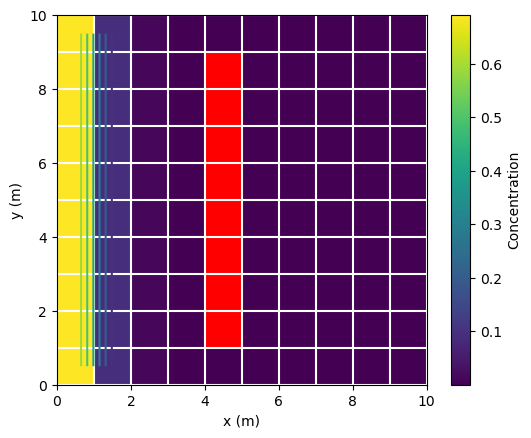

In [8]:
show_concentration(model_path=model_path, name=name, kstpkper=(0, 0));

At the last time step the concentration at the right side increased to
about 7 mg/L:

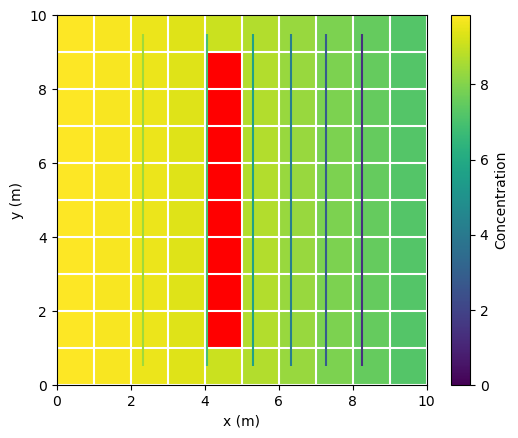

In [9]:
show_concentration(model_path=model_path, name=name, vmin=0);

Our objective is to keep the concentration at right side at
maximum of around 2 mg/L. 
To achieve this, we pump form the wells in the center.
We would like to optimize the pumping rate so such at any
time, we pump only as much water as needed keep the traget 
concentration at right side.

We do this in new Notebook *Controlled_Simple_Transport*.